In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Position_Salaries.csv')

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
y = y.reshape(-1, 1)

<ipython-input-1-d1417bd66f9b>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


In [2]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X) #FS
y = sc_y.fit_transform(y) #FS

print(X, y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [3]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')

regressor.fit(X, y) #FS 상태로 학습

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [4]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

[[Level 6.5일 때 Salary 예측]]

1. `predict()` 함수로 6.5일 때 Salary를 예측하려고 했으나, `regressor` 객체 변수는 스케일링된 값으로 학습이 되어 있음.

2. 6.5라는 값을 X 기준으로 스케일링 한 후 `predict()` 함수로 예측

3. `regressor` 함수는 리턴 또한 스케일링 된 값임

4. 리턴된 값은 y 예측 결과값이므로 y 기준 역스케일링

5. 결과값 확인 가능

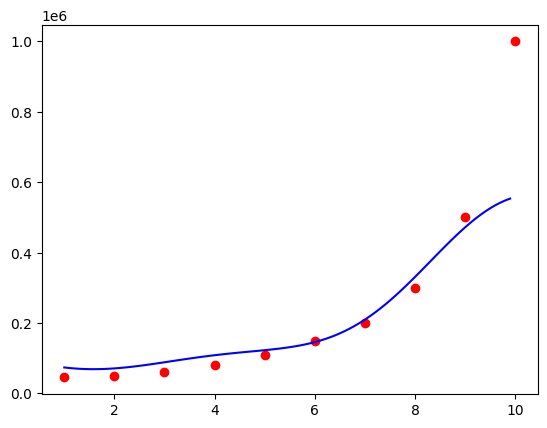

In [5]:
import matplotlib.pyplot as plt

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')